# Function with transient and noise (F4)

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# defining sampling frequency, time step and time vector
fs = 100
dt = 1/fs
t = np.arange(0,5,dt)#0:1/fs:5-1/fs;
nt = len(t)
print('the number of data points is:',nt)

# Defining a simple function to analyse
fun1 = np.zeros(nt)

# changing to equaly spaced delta function
fun1[::2]=1    # taking every second value of the vector and replace it with 1


# introducing the transient function



fun2 = fun1
fun2[nt//2] += 3

######## introducing more complex transient
# random indeces with transient
xt = [421,128,408,122,465,175,99,126,309,237,176,416,293,275,459,143,379,377,191,284]
# random transient values
tr = [2,4,4,3,2,3,5,2,3,2,4,2,3,4,5,5,3,2,4,2]

tr2 = np.zeros(nt)

tr2[xt]=tr

fun3 = fun1 + tr2 + 1.5*(np.random.rand(fun2.size)) 
t2 = np.full(nt, np.nan)
t2[xt] = tr
s2 = np.zeros(nt)
s2[:] = fun3
s2[xt] = np.nan
fun3

the number of data points is: 500


array([1.12014353e+00, 4.66482230e-01, 1.88040633e+00, 4.03625316e-01,
       1.18154326e+00, 6.07660483e-01, 1.57057693e+00, 1.30275761e+00,
       1.05542207e+00, 1.32459341e+00, 1.09260512e+00, 7.15242613e-01,
       2.02543746e+00, 9.24362083e-01, 1.29293908e+00, 7.08589362e-01,
       2.34802056e+00, 1.05567828e-01, 1.21483554e+00, 1.04750058e+00,
       2.32149631e+00, 5.44327904e-01, 1.27370622e+00, 3.61686742e-01,
       1.95814530e+00, 1.83629667e-01, 1.69858717e+00, 1.24177967e+00,
       1.30175828e+00, 4.77138120e-01, 1.23611195e+00, 1.29246189e+00,
       2.39748881e+00, 2.44716652e-01, 1.64412357e+00, 1.49259466e+00,
       1.38421129e+00, 1.14886800e+00, 1.92928241e+00, 4.47543553e-01,
       1.00650056e+00, 1.33126138e+00, 1.81778665e+00, 8.29054082e-01,
       1.24749221e+00, 8.00666562e-01, 1.15749515e+00, 7.00151632e-01,
       1.94331033e+00, 1.35943910e+00, 1.06264911e+00, 1.36916757e+00,
       2.14302185e+00, 8.19245092e-01, 2.35949302e+00, 4.50576001e-01,
      

In [3]:
# Setting STA/LTA parameters to be checked in the loop


nL = 9
nS = 9
nP = 8

trig = 1.5
LTA_d =  np.linspace(10,50,nL,dtype=int)
STA_d = np.linspace(2,10,nS,dtype=int)
PEM_d = np.linspace(1,8,nP,dtype=int)

# Creating empty vectors for STA and LTA

STA3 = np.linspace(0,0,nt)

LTA3 = np.linspace(0,0,nt)

ratio3 = np.linspace(0,0,nt)

print('PEM:',PEM_d, 'length:',len(PEM_d))
print('LTA:',LTA_d, 'length:',len(LTA_d))
print('STA:',STA_d, 'length:',len(STA_d))

mat_SL = []
mat_missSL = []
mat_T = []
PEMlist = []
PEMmiss = []
PEMtrue = []

PEM: [1 2 3 4 5 6 7 8] length: 8
LTA: [10 15 20 25 30 35 40 45 50] length: 9
STA: [ 2  3  4  5  6  7  8  9 10] length: 9


In [4]:
for pp in range(len(PEM_d)):
    PEM = int(PEM_d[pp])
    mat_SL = np.zeros((len(STA_d),len(LTA_d)))
    mat_missSL = np.zeros((len(STA_d),len(LTA_d)))
    
                # loop for LTA
    for ll in range(len(LTA_d)):
#        print('this is ll ',ll)
        LTA = int(LTA_d[ll])
        # calculation of LTA for this LTA loop
        for k in range(len(fun1)-LTA):
            LTA3[k] = np.mean(abs(fun3[k:(LTA+k)]))

            # loop for STA            
        for ss in range(len(STA_d)):
#            print('this is ss ',ss)
            STA = int(STA_d[ss])

            for k in range(len(fun1)-STA):
                STA3[k] = np.mean(abs(fun3[k:(STA+k)]))

            
            # loop for ratio
            for k in range(len(fun1)-LTA):
                ratio3[k+LTA] = STA3[k+LTA-STA] / LTA3[k]
                
                
            # Stationary and transient separation
            numbers3 =[]
            cc = 0
            for kk in range(len(ratio3)):
                if ratio3[kk] >= trig and ratio3[kk-1] <= trig:
                    numb3 = kk
                    numbers3.append(numb3)
                    cc = cc+1
                    
            trans3 = np.linspace(0,0,nt)
            stat3 = np.linspace(0,0,nt)
        
            # FUN3 -  a loop for extracting the whole vecotr data for stationary and transient parts of the signal 
            i = 0
            kk = 0
            while kk <= nt-1:
                if kk + PEM <= nt-1:
                    # case when there is only one peak
                    if len(numbers3) == 1:
                        if ratio3[kk+PEM] >= trig and ratio3[kk+PEM-1] <= trig:
                            while kk < numbers3[i]+PEM:
                                trans3[kk] = fun3[kk]
                                stat3[kk] =  np.nan
                                kk = kk + 1
                        else:
                            stat3[kk] = fun3[kk]
                            trans3[kk] =  np.nan
                            kk = kk + 1
                    elif i > len(numbers3):
                        while kk <= nt:
                            stat3[kk] = fun3[kk]
                            trans3[kk] =  np.nan
                            kk = kk + 1
                    else:
                        if ratio3[kk+PEM] >= trig and ratio3[kk+PEM-1] <= trig:
                            while kk < numbers3[i]+PEM:
                                trans3[kk] = fun3[kk]
                                stat3[kk] =  np.nan
                                kk = kk + 1 
                            # dopoki numbers(i+1)+pem < kk 
                            if i <= len(numbers3):
                                if numbers3[i]-PEM <= kk:
                                    while numbers3[i]-PEM <= kk:
                                        # dopoki
                                        while kk < numbers3[i]+PEM:
                                            trans3[kk] = fun3[kk]
                                            stat3[kk] =  np.nan
                                            kk = kk + 1
                                        i = i + 1
                                        #jesli tak, to do konca numbers(i+1)+Pem - transient
                                        if i+1 > len(numbers3):
                                            break
                                else:
                                    i = i + 1
                                    # jesli nie, idziemy dalej normlanie
                            else:
                                stat3[kk] = fun3[kk]
                                trans3[kk] =  np.nan
                                kk = kk + 1
                        else:
                            stat3[kk] = fun3[kk]
                            trans3[kk] =  np.nan
                            kk = kk + 1
                else:
                    stat3[kk] = fun3[kk]
                    trans3[kk] =  np.nan
                    kk = kk + 1 
            
            #end of stationary/transient separation loop level
            
            # loop for calculating the percentage of found transient
            count = 0
            
            for kk in range(len(xt)):
                i_tr = xt[kk]  # index of transient
                v_tr = fun3[i_tr] # value of function in a given transient 
                
                if v_tr == trans3[i_tr]:
                    
                    count += 1     # counting how much calculated transient values fit the function
                #print('this is transient value',trans3[i_tr],'and this is in function',v_tr,'. DOdajemy: count=',count )
            
            cnot = 0
            for bb in range(len(trans3)):
                if trans3[bb] == 0 or trans3[bb] == 1:
                    cnot += 1    # number of data which in principle is stationary 
             
            ctrue = 0 
            mi = 0
            for tt in range(len(trans3)):
                if trans3[tt] == t2[tt]:
                    ctrue += 1
                    #print('tis is transient',trans3[tt],'tis is input',t2[tt],'so we count',ctrue)
                elif stat3[tt] == s2[tt]:
                    ctrue += 1
                    #print('tis is stationary',stat3[tt],'tis is input',s2[tt],'so we count',ctrue)
                else:
                    mi += 1
                    #print('this is missed one', mi,'value = ',fun3[tt],'stat = ',stat3[tt],'trans = ',trans3[tt])
                        # calculating the percentage of true true detection
            
            true_perc = ctrue/len(trans3)
            print('true true percentage:',true_perc,'STA:',STA,'LTA:',LTA,'PEM:',PEM) 
            mat_missSL[ss,ll] = true_perc
            
            
            # calculating the percentage of fit
            fit_perc = count/len(xt)
            mat_SL[ss,ll] = fit_perc
            
#            print('this is the fit percentage',fit_perc,'so ',count,'out of ',len(xt),'are detected')
#            print('this is STA ',STA, 'LTA',LTA ,'and PEM = ',PEM)
            #print(trans3)
            
            # calculating the percentage of transient data within the chosen transient vector
#            print('how much not transient',cnot,'. length of the transient',len(trans3),'number of nan inside',sum(~np.isnan(trans3)))
#            print('percentage on non-transient in the vector', cnot/ (len(trans3)-sum(np.isnan(trans3))))
            #misfit_perc = 1 - cnot/sum(~np.isnan(trans3))

            #print(misfit_perc)
            

            
            
#            fig = plt.figure()
 #           ax1 = fig.add_subplot(111)
  #          fig.set_size_inches(18.5, 5, forward=True)
   #         ax1.stem(t,trans3,'b', markerfmt='bo', label='transient')
    #        ax1.stem(t,stat3,'r', markerfmt='go', label='stationary')
     #       ax1.plot(t,ratio3, label='ratio')
      #      ax1.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
       #     ax1.set_ylabel('Amplitude', fontsize=16)
        #    ax1.set_title('Function with the transient', fontsize=20)
         #   ax1.set_xlabel('Time', fontsize=16)
          #  plt.ion()
           # plt.draw()
            #plt.pause(0.01)


            #mat_T[ss,ll] = true_perc   
            
        # end STA loop level
    PEMlist.append(mat_SL)
    PEMmiss.append(mat_missSL)
    #PEMtrue.append(mat_true)
    # end LTA loop level
    
# end PEM loop level    

true true percentage: 0.926 STA: 2 LTA: 10 PEM: 1
true true percentage: 0.918 STA: 3 LTA: 10 PEM: 1
true true percentage: 0.94 STA: 4 LTA: 10 PEM: 1
true true percentage: 0.96 STA: 5 LTA: 10 PEM: 1
true true percentage: 0.96 STA: 6 LTA: 10 PEM: 1
true true percentage: 0.96 STA: 7 LTA: 10 PEM: 1
true true percentage: 0.96 STA: 8 LTA: 10 PEM: 1
true true percentage: 0.96 STA: 9 LTA: 10 PEM: 1
true true percentage: 0.96 STA: 10 LTA: 10 PEM: 1
true true percentage: 0.918 STA: 2 LTA: 15 PEM: 1
true true percentage: 0.928 STA: 3 LTA: 15 PEM: 1
true true percentage: 0.93 STA: 4 LTA: 15 PEM: 1
true true percentage: 0.95 STA: 5 LTA: 15 PEM: 1
true true percentage: 0.96 STA: 6 LTA: 15 PEM: 1
true true percentage: 0.96 STA: 7 LTA: 15 PEM: 1
true true percentage: 0.96 STA: 8 LTA: 15 PEM: 1
true true percentage: 0.96 STA: 9 LTA: 15 PEM: 1
true true percentage: 0.96 STA: 10 LTA: 15 PEM: 1
true true percentage: 0.92 STA: 2 LTA: 20 PEM: 1
true true percentage: 0.914 STA: 3 LTA: 20 PEM: 1
true true per

true true percentage: 0.96 STA: 7 LTA: 10 PEM: 3
true true percentage: 0.96 STA: 8 LTA: 10 PEM: 3
true true percentage: 0.96 STA: 9 LTA: 10 PEM: 3
true true percentage: 0.96 STA: 10 LTA: 10 PEM: 3
true true percentage: 0.78 STA: 2 LTA: 15 PEM: 3
true true percentage: 0.834 STA: 3 LTA: 15 PEM: 3
true true percentage: 0.876 STA: 4 LTA: 15 PEM: 3
true true percentage: 0.93 STA: 5 LTA: 15 PEM: 3
true true percentage: 0.96 STA: 6 LTA: 15 PEM: 3
true true percentage: 0.96 STA: 7 LTA: 15 PEM: 3
true true percentage: 0.96 STA: 8 LTA: 15 PEM: 3
true true percentage: 0.96 STA: 9 LTA: 15 PEM: 3
true true percentage: 0.96 STA: 10 LTA: 15 PEM: 3
true true percentage: 0.79 STA: 2 LTA: 20 PEM: 3
true true percentage: 0.822 STA: 3 LTA: 20 PEM: 3
true true percentage: 0.884 STA: 4 LTA: 20 PEM: 3
true true percentage: 0.9 STA: 5 LTA: 20 PEM: 3
true true percentage: 0.952 STA: 6 LTA: 20 PEM: 3
true true percentage: 0.96 STA: 7 LTA: 20 PEM: 3
true true percentage: 0.96 STA: 8 LTA: 20 PEM: 3
true true perc

true true percentage: 0.66 STA: 2 LTA: 15 PEM: 5
true true percentage: 0.738 STA: 3 LTA: 15 PEM: 5
true true percentage: 0.806 STA: 4 LTA: 15 PEM: 5
true true percentage: 0.912 STA: 5 LTA: 15 PEM: 5
true true percentage: 0.96 STA: 6 LTA: 15 PEM: 5
true true percentage: 0.96 STA: 7 LTA: 15 PEM: 5
true true percentage: 0.96 STA: 8 LTA: 15 PEM: 5
true true percentage: 0.96 STA: 9 LTA: 15 PEM: 5
true true percentage: 0.96 STA: 10 LTA: 15 PEM: 5
true true percentage: 0.674 STA: 2 LTA: 20 PEM: 5
true true percentage: 0.732 STA: 3 LTA: 20 PEM: 5
true true percentage: 0.824 STA: 4 LTA: 20 PEM: 5
true true percentage: 0.868 STA: 5 LTA: 20 PEM: 5
true true percentage: 0.944 STA: 6 LTA: 20 PEM: 5
true true percentage: 0.96 STA: 7 LTA: 20 PEM: 5
true true percentage: 0.96 STA: 8 LTA: 20 PEM: 5
true true percentage: 0.96 STA: 9 LTA: 20 PEM: 5
true true percentage: 0.96 STA: 10 LTA: 20 PEM: 5
true true percentage: 0.676 STA: 2 LTA: 25 PEM: 5
true true percentage: 0.732 STA: 3 LTA: 25 PEM: 5
true tru

true true percentage: 0.96 STA: 6 LTA: 15 PEM: 7
true true percentage: 0.96 STA: 7 LTA: 15 PEM: 7
true true percentage: 0.96 STA: 8 LTA: 15 PEM: 7
true true percentage: 0.96 STA: 9 LTA: 15 PEM: 7
true true percentage: 0.96 STA: 10 LTA: 15 PEM: 7
true true percentage: 0.564 STA: 2 LTA: 20 PEM: 7
true true percentage: 0.646 STA: 3 LTA: 20 PEM: 7
true true percentage: 0.764 STA: 4 LTA: 20 PEM: 7
true true percentage: 0.83 STA: 5 LTA: 20 PEM: 7
true true percentage: 0.936 STA: 6 LTA: 20 PEM: 7
true true percentage: 0.96 STA: 7 LTA: 20 PEM: 7
true true percentage: 0.96 STA: 8 LTA: 20 PEM: 7
true true percentage: 0.96 STA: 9 LTA: 20 PEM: 7
true true percentage: 0.96 STA: 10 LTA: 20 PEM: 7
true true percentage: 0.566 STA: 2 LTA: 25 PEM: 7
true true percentage: 0.646 STA: 3 LTA: 25 PEM: 7
true true percentage: 0.762 STA: 4 LTA: 25 PEM: 7
true true percentage: 0.788 STA: 5 LTA: 25 PEM: 7
true true percentage: 0.906 STA: 6 LTA: 25 PEM: 7
true true percentage: 0.96 STA: 7 LTA: 25 PEM: 7
true true

In [5]:
print(trans3)
print(np.isnan(trans3))
print(sum(np.isnan(trans3)))
print((len(trans3)-sum(np.isnan(trans3))))
print(sum(~np.isnan(trans3)))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [6]:
print(STA_d)
print(np.size(LTA_d))
print(np.shape(PEM_d))
print(len(PEMmiss))

[ 2  3  4  5  6  7  8  9 10]
9
(8,)
8


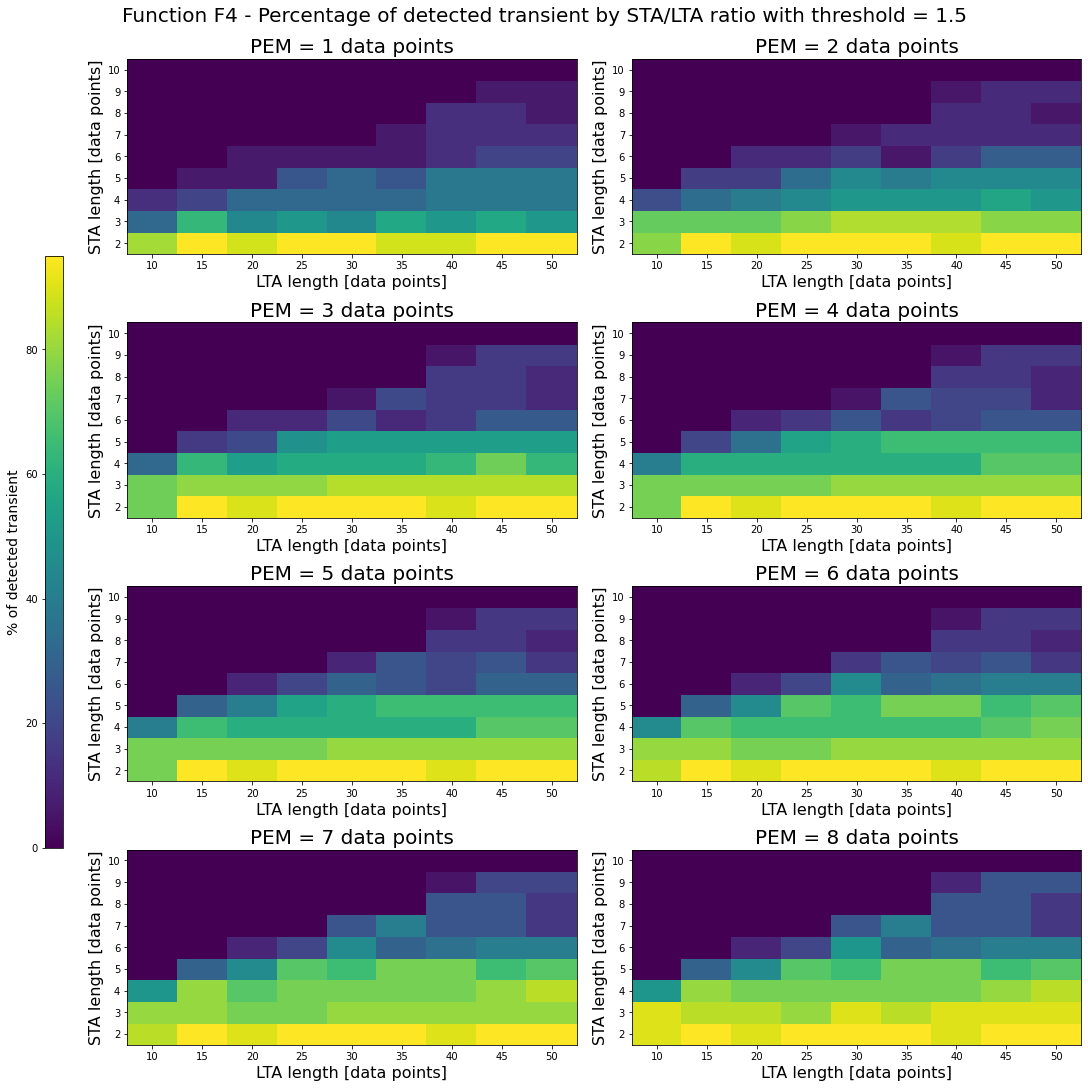

In [7]:
fig, axs = plt.subplots(nrows=len(PEM_d)//2,ncols=2,constrained_layout=True)#)

fig.set_size_inches(15, 15, forward=True)
fig.suptitle("Function F4 - Percentage of detected transient by STA/LTA ratio with threshold = {}".format(trig), fontsize=20)

iii = 0
for ax in axs.flat:
    pcm = ax.pcolormesh(LTA_d,STA_d,PEMlist[iii]*100,shading='nearest') 
    ax.set_xlabel('LTA length [data points]', fontsize=16)
    ax.set_ylabel('STA length [data points]', fontsize=16)
    ax.set_title('PEM = {} data points'.format(PEM_d[iii]), fontsize=20)
    iii += 1

cbar = fig.colorbar(pcm, ax = axs[:,:], location='left', shrink=0.6)
cbar.set_label('% of detected transient', fontsize = 14)

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/SLperc_F4.eps")


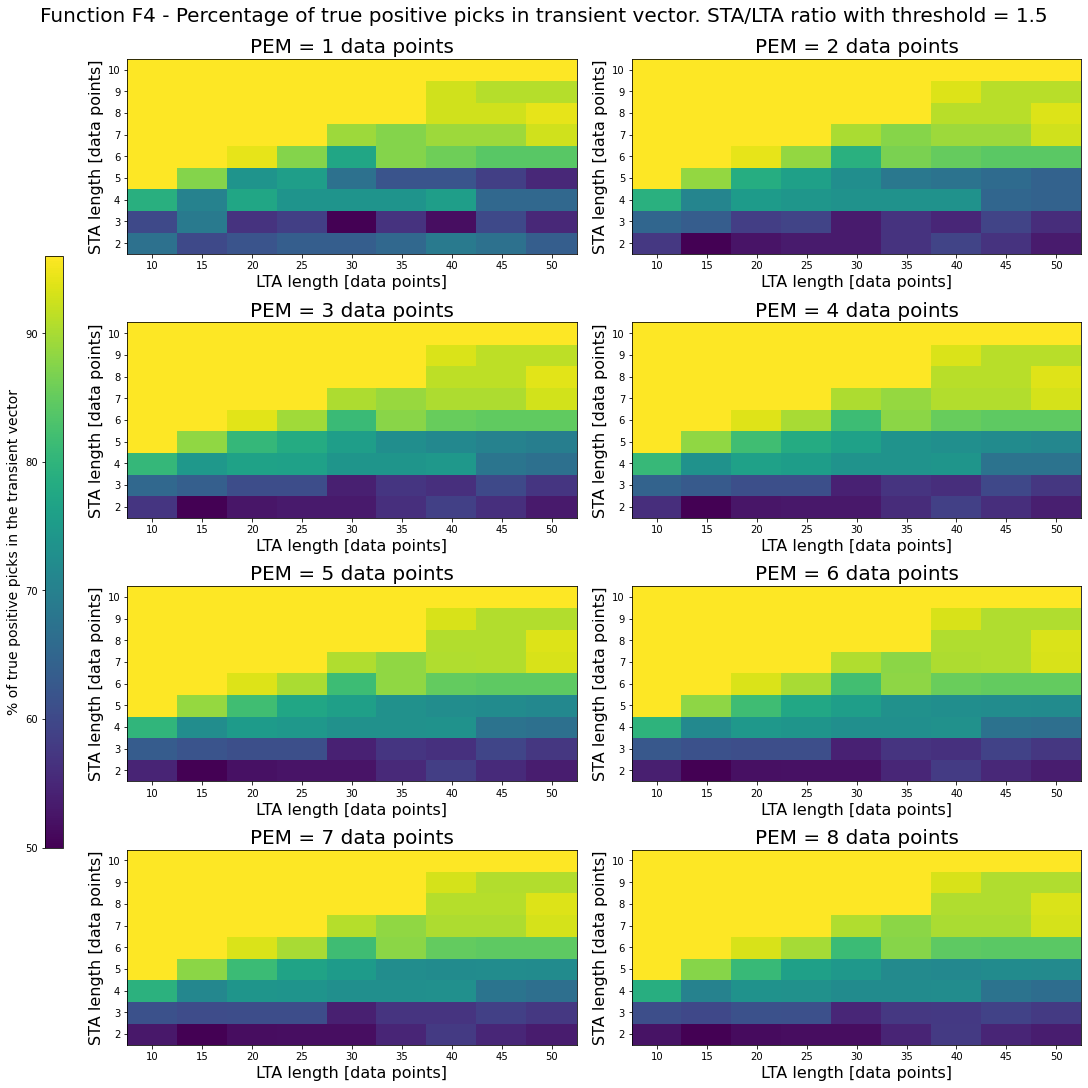

In [8]:
fig, axs = plt.subplots(nrows=len(PEM_d)//2,ncols=2,constrained_layout=True)#)

fig.set_size_inches(15, 15, forward=True)
fig.suptitle("Function F4 - Percentage of true positive picks in transient vector. STA/LTA ratio with threshold = {}".format(trig), fontsize=20)

iii = 0
for ax in axs.flat:
    pcm = ax.pcolormesh(LTA_d,STA_d,PEMmiss[iii]*100,shading='nearest')#, vmin=0, vmax = 100) 
    ax.set_xlabel('LTA length [data points]', fontsize=16)
    ax.set_ylabel('STA length [data points]', fontsize=16)
    ax.set_title('PEM = {} data points'.format(PEM_d[iii]), fontsize=20)
    iii += 1

cbar = fig.colorbar(pcm, ax = axs[:,:], location='left', shrink=0.6)
cbar.set_label('% of true positive picks in the transient vector', fontsize = 14)

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/turetrue_F4.eps")



In [9]:
# checking out the best STA/LTA/PEM combination
param_check = []

iii = 0
for kkk in range(len(PEMlist)):
    temp = PEMlist[kkk]*0.7 + PEMmiss[kkk]*0.3
    temp = temp/2
    param_check.append(temp)
    #print(param_check)
np.shape(param_check)   

(8, 9, 9)

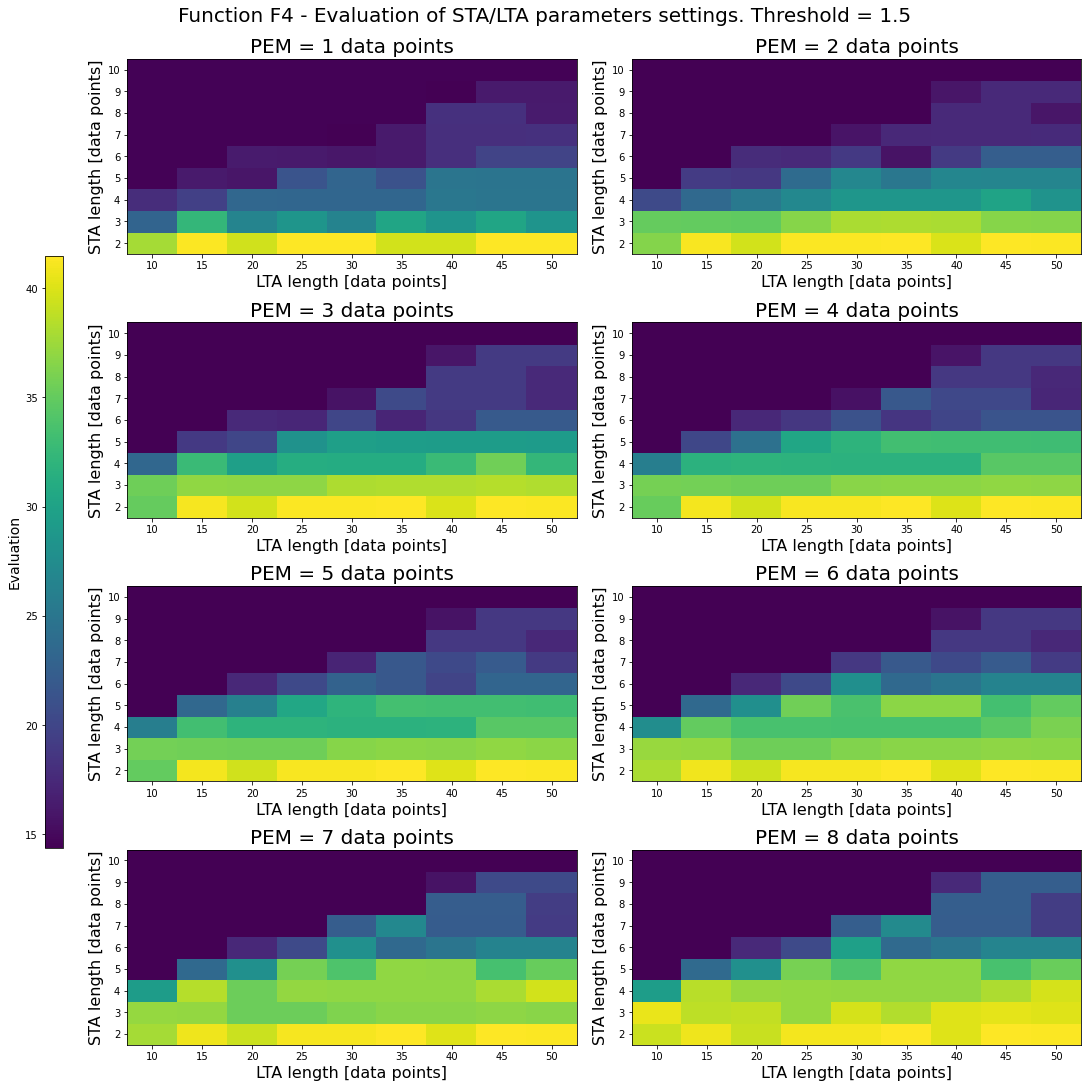

In [10]:
fig, axs = plt.subplots(nrows=len(PEM_d)//2,ncols=2,constrained_layout=True)#)

fig.set_size_inches(15, 15, forward=True)
fig.suptitle("Function F4 - Evaluation of STA/LTA parameters settings. Threshold = {}".format(trig), fontsize=20)

iii = 0
for ax in axs.flat:
    pcm = ax.pcolormesh(LTA_d,STA_d,param_check[iii]*100,shading='nearest')#, vmin=0, vmax = 100) 
    ax.set_xlabel('LTA length [data points]', fontsize=16)
    ax.set_ylabel('STA length [data points]', fontsize=16)
    ax.set_title('PEM = {} data points'.format(PEM_d[iii]), fontsize=20)
    iii += 1

cbar = fig.colorbar(pcm, ax = axs[:,:], location='left', shrink=0.6)
cbar.set_label('Evaluation', fontsize = 14)

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/param_F4.eps")


